In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [52]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

Определяем пропуски в данных. Как оказывается, что пропуски содержатся только в колонках lat и lng и их количество составляет всего лишь 0,63% от общего кол-ва записей в датасете.

In [53]:
cols_null_percent = hotels.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

lat    0.63288
lng    0.63288
dtype: float64

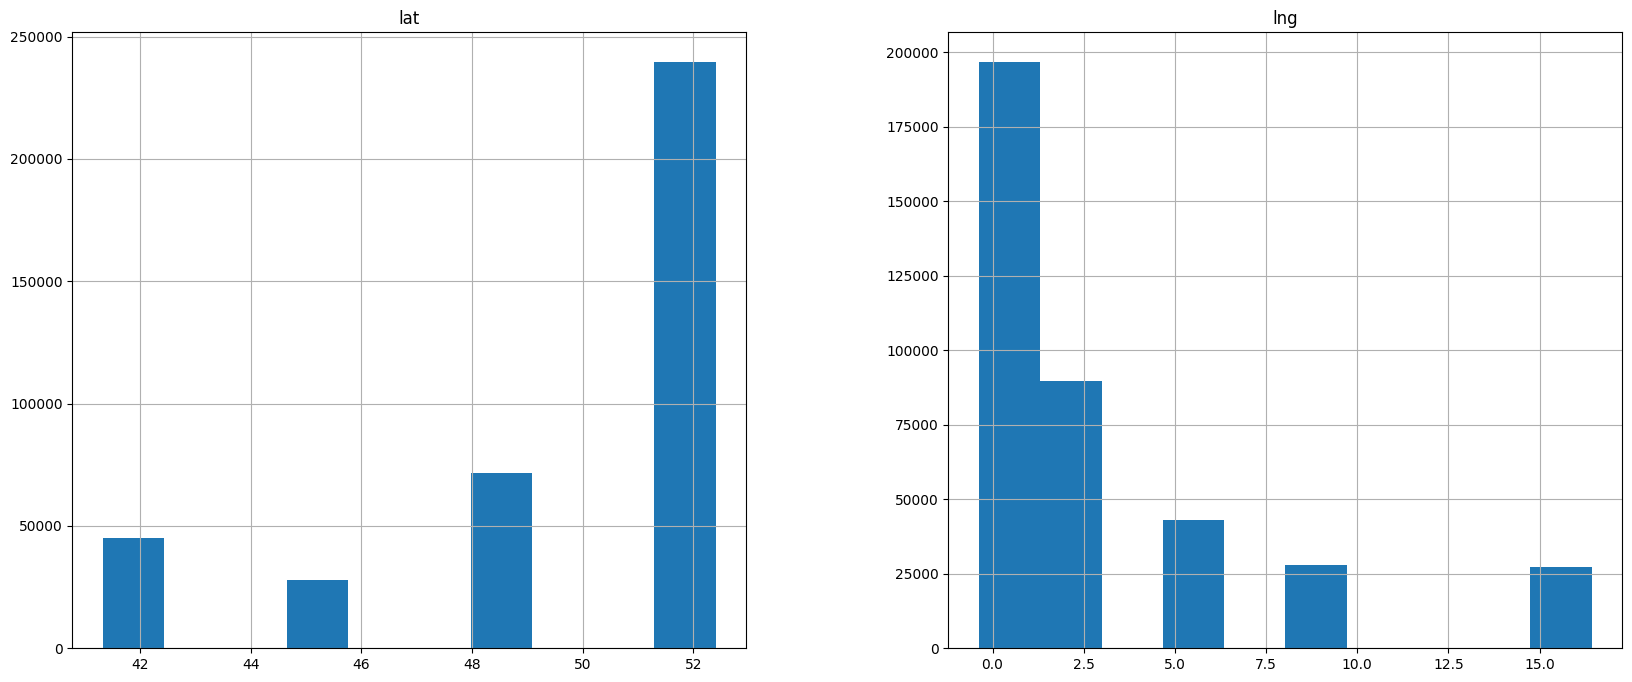

In [66]:
cols = cols_with_null.index
hotels[cols].hist(figsize=(20, 8));

In [54]:
hotels['emp_lat'] = np.where(hotels['lat'].isnull(), 0,1)
hotels.head(6)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,emp_lat
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,1
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540,1
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060,1
5,Via Mecenate 121 20138 Milan Italy,105,12/30/2015,8.0,Novotel Milano Linate Aeroporto,France,Nothing,2,1607,Very nice hotel Price is excellent when compa...,16,1,10.0,"[' Business trip ', ' Solo traveler ', ' Super...",582 day,45.448188,9.257046,1


In [55]:
hotels[hotels['emp_lat']==0]['hotel_address'].value_counts()

hotel_address
Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    496
Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            421
W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       285
4 rue de la P pini re 8th arr 75008 Paris France               224
Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         182
W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          172
Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               141
Bail n 4 6 Eixample 08010 Barcelona Spain                      113
Sieveringer Stra e 4 19 D bling 1190 Vienna Austria            112
Gr nentorgasse 30 09 Alsergrund 1090 Vienna Austria             63
23 Rue Damr mont 18th arr 75018 Paris France                    47
Hasenauerstra e 12 19 D bling 1190 Vienna Austria               44
Josefst dter Stra e 22 08 Josefstadt 1080 Vienna Austria        40
Paragonstra e 1 11 Simmering 1110 Vienna Austria                34
20 Rue De La Ga t 14th arr 75014 Paris France   

In [59]:
# На вход данной функции поступает строка с адресом.
def get_country(address):
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только последний элемент - страна нахождения гостиницы
# потенциальный подтип улицы, и заносим в переменную street_type.
    country = address_list[-1]
    city = address_list[-2]
    if country == 'Kingdom':
        country = address_list[-2]+' '+address_list[-1]
        city = address_list[-5]
    return country

In [57]:
hotels['city'] = hotels['hotel_address'].apply(get_country)

In [60]:
hotels['country'] = hotels['hotel_address'].apply(get_country)

In [58]:
hotels['city'].value_counts()

city
London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: count, dtype: int64

In [61]:
hotels['country'].value_counts()

country
United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: count, dtype: int64

In [78]:
hotels[hotels['average_score']<6].head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,emp_lat,city,country
5666,Viale Bligny 56 Milan City Center 20136 Milan ...,26,2/17/2017,5.2,Hotel Liberty,Poland,The shower water pressure was absolutely miss...,40,465,The stuff was extremely nice The breakfast wa...,30,1,7.1,"[' Leisure trip ', ' Couple ', ' Double Room '...",167 day,45.450867,9.194866,1,Milan,Italy
18895,Viale Bligny 56 Milan City Center 20136 Milan ...,26,5/2/2017,5.2,Hotel Liberty,Czech Republic,No Negative,0,465,The Wi Fi was reachable near the lobby The ro...,41,6,5.4,"[' Leisure trip ', ' Couple ', ' Double Room '...",93 days,45.450867,9.194866,1,Milan,Italy
28330,Viale Bligny 56 Milan City Center 20136 Milan ...,26,5/25/2016,5.2,Hotel Liberty,United Kingdom,Shower box is not provided enough water and t...,14,465,Breakfast is good Weekday staff is very kind ...,16,40,5.8,"[' Leisure trip ', ' Solo traveler ', ' Single...",435 day,45.450867,9.194866,1,Milan,Italy
42524,Viale Bligny 56 Milan City Center 20136 Milan ...,26,10/28/2016,5.2,Hotel Liberty,United Arab Emirates,Not clean no wi fi in rooms Old furniture and...,13,465,Location is not bad,5,2,3.8,"[' Leisure trip ', ' Couple ', ' Double Room '...",279 day,45.450867,9.194866,1,Milan,Italy
48461,Viale Bligny 56 Milan City Center 20136 Milan ...,26,7/18/2016,5.2,Hotel Liberty,Malta,Very dirty poorly staffed Airconditioners do ...,9,465,No Positive,0,2,4.6,"[' Leisure trip ', ' Group ', ' Double Room ',...",381 day,45.450867,9.194866,1,Milan,Italy


In [67]:
hotels.describe()

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,emp_lat
count,386803.000000,386803.000000,386803.000000,386803.000000,386803.000000,386803.00000,386803.000000,384355.000000,384355.000000,386803.000000
mean,498.246536,8.397231,18.538988,2743.992042,17.776985,7.17725,8.396906,49.443522,2.823402,0.993671
std,500.258012,0.547881,29.703369,2316.457018,21.726141,11.05442,1.636090,3.466936,4.579043,0.079302
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.00000,2.500000,41.328376,-0.369758,0.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.00000,7.500000,48.214662,-0.143649,1.000000
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.00000,8.800000,51.499981,-0.000250,1.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.00000,9.600000,51.516288,4.834443,1.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.00000,10.000000,52.400181,16.429233,1.000000


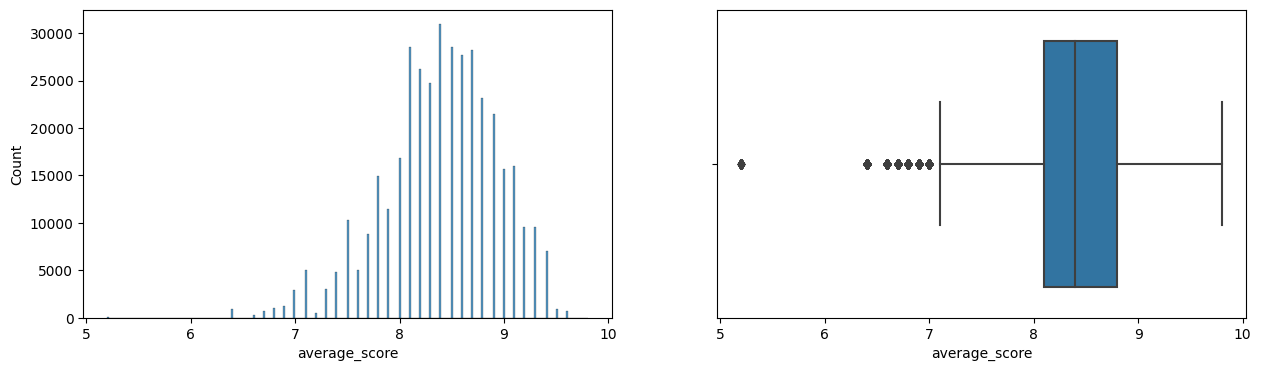

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=hotels, x='average_score', ax=axes[0]);
#histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=hotels, x='average_score', ax=axes[1]);
#boxplot.set_title('Full Square Boxplot');

In [83]:
dupl_columns = list(hotels.columns)

mask = hotels.duplicated(subset=dupl_columns)
hotels_duplicates = hotels[mask]
print(f'Число найденных дубликатов: {hotels_duplicates.shape[0]}')

Число найденных дубликатов: 307


In [88]:
hotels_duplicates['hotel_name'].value_counts()

hotel_name
H tel Concorde Montparnasse         211
H tel Baume                          49
Hotel Le Sainte Beuve                33
Villa Eugenie                         8
Pertschy Palais Hotel                 1
The Bloomsbury Hotel                  1
Hotel Da Vinci                        1
Mercure Paris Centre Tour Eiffel      1
Park Plaza Vondelpark Amsterdam       1
Fletcher Hotel Amsterdam              1
Name: count, dtype: int64

In [92]:
hotels_duplicates[hotels_duplicates['hotel_name']=='Hotel Da Vinci']

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,emp_lat,city,country
260390,Via Senigallia 6 20161 Milan Italy,904,1/4/2016,8.1,Hotel Da Vinci,Greece,The location is too far from city center 1 km...,29,16670,Excellent breakfast variaty of goods wifi goo...,16,11,6.7,"[' Leisure trip ', ' Family with older childre...",577 day,45.533137,9.171102,1,Milan,Italy
